# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.regressionplots import add_lowess
from statsmodels.sandbox.predict_functional import predict_functional

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
df = pd.read_csv(url)

# Create a dataset with no missing values for analyzing BMI as the outcome.
vars = ["RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = df[vars].dropna()

# Create a dataset with no missing values for analyzing alcohol consumption as the outcome.
vars = ["RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "ALQ110"]
db = df[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [3]:
m0 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da)
r0 = m0.fit()
r0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.601
Date:                Sun, 30 Apr 2023   Prob (F-statistic):             0.0578
Time:                        15:20:58   Log-Likelihood:                -18247.
No. Observations:                5406   AIC:                         3.650e+04
Df Residuals:                    5404   BIC:                         3.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0306      0.286    101.473      0.000      28.470      29.591
RIDAGEYR       0.0104      0.005      1.898      0.058      -0.000       0.021
==============================================================================
Omnibus:                     1027.316   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2085.479
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                       5.035   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

Older people tend to have greater BMI than younger people.  Specifically, for each additional year of age, the expected BMI is 0.01 units greater.

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

The p-value for age is 0.06.  Generally, a relationship is considered to be statistically significant only if the p-value is smaller than 0.05.  Therefore, we would not consider this relationship to be statistically significant in most settings.

__Q1c.__ Use linear regression to relate BMI to age in two separate subsets of data: people younger than 45 years, or people older than 45 years, controlling for sex in each model.  Comment on how these models relate to the model that was fit above that did not restrict age.

In [4]:
# 45 years of age or younger
print("Subjects of age 45 years or younger:")
m1 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDR", data=da[da.RIDAGEYR<=45])
r1 = m1.fit()
print(r1.summary())

# Older than 45
m2 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDR", data=da[da.RIDAGEYR>45])
r2 = m2.fit()
print("\nSubjects older than 45 years of age:")
print(r2.summary())

Subjects of age 45 years or younger:
                            OLS Regression Results                            
Dep. Variable:                 BMXBMI   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     31.90
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.12e-14
Time:                        15:20:58   Log-Likelihood:                -8207.9
No. Observations:                2395   AIC:                         1.642e+04
Df Residuals:                    2392   BIC:                         1.644e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     2

There are strong statistically significant relationships between BMI and age within both subsets of data.  Among younger people, age is positively associated with BMI, but among older people, age is negatively associated with BMI.  Apparently when combining people of all ages, these opposing relationships result in no overall relationship.

__Q1d.__ Based on the model for people aged 45 and under, how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [5]:
r1.params["RIDAGEYR"] * 20

3.1537671158578306

The BMI of an average 40 year old is 3.2 units greater than the BMI of an average 20 year old.

__Q1d.__ What fraction of the variation of BMI in people younger than 45 years is explained by age and sex?

In [6]:
r1.rsquared

0.02598228846848094

## Question 2: 

Include sex and ethnicity as additional control variables in your linear model relating BMI to age, for people age 45 and under.  You will need to refer to the coding scheme for the ethnic groups in the codebook: [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [7]:
m3 = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDR + C(RIDRETH1)", data=da[da.RIDAGEYR<=45])
r3 = m3.fit()
print(r3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 BMXBMI   No. Observations:                 2395
Model:                            GLM   Df Residuals:                     2388
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          52.736
Method:                          IRLS   Log-Likelihood:                -8143.3
Date:                Sun, 30 Apr 2023   Deviance:                   1.2593e+05
Time:                        15:20:58   Pearson chi2:                 1.26e+05
No. Iterations:                     3   Pseudo R-squ. (CS):            0.07998
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           25.0020      0.871  

__Q2a.__ How did the conditional mean relationship between BMI and age change when you added ethnicity to the model?

The age slope is somewhat attenuated (closer to zero) after controlling for ethnicity.

__Q2b.__ How did the standard error for the regression parameter for age change when you added ethnicity to the model?

The standard error is essentially unchanged after controlling for ethnicity.

__Q2c.__ How much additional variation in BMI is explained by age, sex, and ethnicity that is not explained by age and sex alone?

In [8]:
r3.pseudo_rsquared() - r2.rsquared

0.05826856768336086

The R^2 for the model including ethnicity is around 8% while the R^2 for the model excluding ethnicity is around 2.6%, so around 5 percentage points more variation is explained when including ethnicity in the model.

__Q2d.__ What reference level did the software select for the ethnicity variable?

Group 1, which is "Mexican American".

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic Black man and a 30 year-old non-Hispanic Black man?

In [9]:
10 * r3.params["RIDAGEYR"]

1.5673513833529729

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

In [10]:
-r3.params["C(RIDRETH1)[T.4]"] + r3.params["RIAGENDR"]

0.7640167809800185

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [11]:
m4 = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDR + C(RIDRETH1)", data=da[da.RIDAGEYR<=45].sample(frac=0.25))
r4 = m4.fit()
print(r4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 BMXBMI   No. Observations:                  599
Model:                            GLM   Df Residuals:                      592
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          58.839
Method:                          IRLS   Log-Likelihood:                -2066.8
Date:                Sun, 30 Apr 2023   Deviance:                       34833.
Time:                        15:20:58   Pearson chi2:                 3.48e+04
No. Iterations:                     3   Pseudo R-squ. (CS):            0.06273
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           24.4506      1.876  

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

In [12]:
r4.bse / r1.bse

C(RIDRETH1)[T.2]         NaN
C(RIDRETH1)[T.3]         NaN
C(RIDRETH1)[T.4]         NaN
C(RIDRETH1)[T.5]         NaN
Intercept           2.262871
RIAGENDR            2.064407
RIDAGEYR            2.069828
dtype: float64

The standard errors are around twice as large in the 25% subsample.  This is expected since having four times more data leads to having standard errors that are half as large.  The coefficients that are statistically significant in the subsample consitute a subset of the coefficients that are statistically significant in the larger sample.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

Text(0, 0.5, 'Residual')

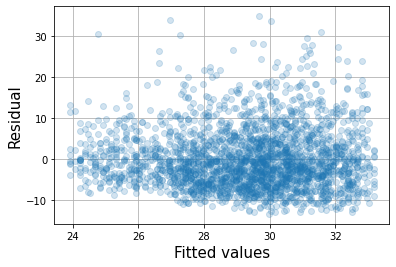

In [13]:
plt.grid(True)
plt.plot(r3.fittedvalues, r3.resid_pearson, "o", alpha=0.2)
plt.xlabel("Fitted values", size=15)
plt.ylabel("Residual", size=15)

__Q4a.__ What mean/variance relationship do you see?

The variance appears to increase with the mean.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

/nfs/turbo/lsa-kshedden/statsmodels/statsmodels/statsmodels/sandbox/predict_functional.py:169: ValueWarning: 'DMDEDUC2', 'SMQ020' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."


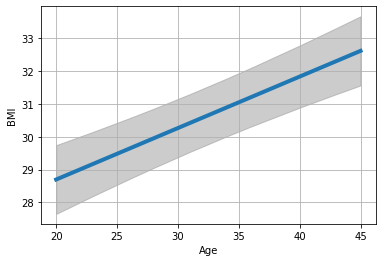

In [14]:
pr, cb, fv = predict_functional(r3, "RIDAGEYR",
                values={"RIAGENDR": 1, "RIDRETH1": 1}, ci_method="simultaneous")

ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.grid(True)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("BMI");

__Q5a.__ According to your graph, is it plausible that conditional mean BMI is constant between ages 30 and 35?

A constant line between ages 30 and 35 at BMI 30.5 falls within the simultaneous confidence band, so this is a plausible constant value for the regression function within the given interval.

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

/nfs/turbo/lsa-kshedden/statsmodels/statsmodels/statsmodels/sandbox/predict_functional.py:169: ValueWarning: 'DMDEDUC2', 'SMQ020' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."


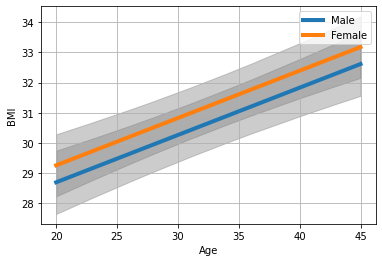

In [15]:
pr2, cb2, fv2 = predict_functional(r3, "RIDAGEYR",
                    values={"RIAGENDR": 2, "RIDRETH1": 1}, ci_method="simultaneous")
                    
ax = sns.lineplot(x=fv, y=pr, lw=4, label="Male")
ax.grid(True)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax = sns.lineplot(x=fv2, y=pr2, lw=4, label="Female")
ax.fill_between(fv2, cb2[:, 0], cb2[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("BMI");

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

49.39012208657048


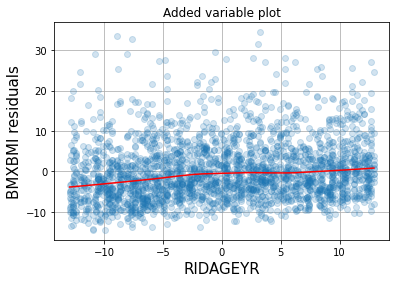

In [31]:
fig = r3.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
add_lowess(ax, frac=0.5)
ax.grid(True);
print(da["RIDAGEYR"].mean())

__Q6a.__ What is your interpretation of the added variable plot?

Up to the mean age (around 49), expected BMI increases approximately linearly with age (approximately four BMI units for 20 years of age) for a fixed sex and ethnicity.  Beyond the mean age, BMI is close to constant.

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [17]:
db = db.loc[db["ALQ110"].isin([1, 2]), :]
db["everdrink"] = 2 - db["ALQ110"] # recode so that 1=12+ lifetime drinks
t = db.groupby(["RIAGENDR", "everdrink"]).size().unstack()

print("Contingency table of sex x ever drink")
print(t)

print("Proportion of ever-drinkers by sex:")
p = t.iloc[:, 1] / t.sum(1)
print(p)

odds = p / (1 - p)
print("Odds:")
print(odds)

print("Log odds:")
print(np.log(odds))

Contingency table of sex x ever drink
everdrink  0.0  1.0
RIAGENDR           
1          243  206
2          608  499
Proportion of ever-drinkers by sex:
RIAGENDR
1    0.458797
2    0.450768
dtype: float64
Odds:
RIAGENDR
1    0.847737
2    0.820724
dtype: float64
Log odds:
RIAGENDR
1   -0.165185
2   -0.197569
dtype: float64


__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

In [18]:
np.log(odds)[2]

-0.19756878621464832

The log odds for females is negative which indicates that less than half of females ever drink. 

__Q7b.__ Does there appear to be an important difference between the rates of alcohol use rate among women and men?

The rates are very similar so it would be hard to argue that the difference is important.

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of sex.

In [19]:
m5 = sm.GLM.from_formula("everdrink ~ RIAGENDR", family=sm.families.Binomial(), data=db)
r5 = m5.fit()
r5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              everdrink   No. Observations:                 1556
Model:                            GLM   Df Residuals:                     1554
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1071.6
Date:                Sun, 30 Apr 2023   Deviance:                       2143.3
Time:                        15:20:59   Pearson chi2:                 1.56e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          5.339e-05
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1328      0.199     -0.668      0.504      -0.522       0.257
RIAGENDR      -0.0324      0.112     -0.288      0.773      -0.253       0.188
==============================================================================
"""

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

The p-value for the sex coefficient is 0.77, so there is no evidence of a difference in drinking rates.

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

In [20]:
print(r5.params["RIAGENDR"])
lo = np.log(odds)
print(lo[2] - lo[1])

-0.03238351166368034
-0.032383511663681114


## Question 9: 

Use logistic regression to relate drinking to age, sex, and education.

In [21]:
m6 = sm.GLM.from_formula("everdrink ~ RIDAGEYR + C(RIAGENDR) + C(DMDEDUC2)", family=sm.families.Binomial(), data=db)
r6 = m6.fit()
r6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              everdrink   No. Observations:                 1556
Model:                            GLM   Df Residuals:                     1548
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1048.1
Date:                Sun, 30 Apr 2023   Deviance:                       2096.3
Time:                        15:20:59   Pearson chi2:                 1.56e+03
No. Iterations:                    19   Pseudo R-squ. (CS):            0.02981
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.2652      0.231     -5.488      0.000      -1.717      -0.813
C(RIAGENDR)[T.2]      -0.0139      0.114     -0.122      0.903      -0.238       0.210
C(DMDEDUC2)[T.2.0]     0.3943      0.195      2.027      0.043       0.013       0.776
C(DMDEDUC2)[T.3.0]     0.7920      0.172      4.595      0.000       0.454       1.130
C(DMDEDUC2)[T.4.0]     0.9423      0.163      5.770      0.000       0.622       1.262
C(DMDEDUC2)[T.5.0]     0.8492      0.172      4.952      0.000       0.513       1.185
C(DMDEDUC2)[T.9.0]   -19.8774   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
RIDAGEYR               0.0082      0.003      2.786      0.005       0.002       0.014
======================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

age and education

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking? You will need to refer to the codebook for the education variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).

In [22]:
pa = r6.params
odds = pa["Intercept"] + pa["C(DMDEDUC2)[T.5.0]"] + 50*pa["RIDAGEYR"] + pa["C(RIAGENDR)[T.2]"]
np.exp(odds)

0.9803576800658983

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

In [25]:
np.exp(pa["C(DMDEDUC2)[T.5.0]"] - pa["C(DMDEDUC2)[T.3.0]"])

1.0588985277646967

__Q9d.__ Did the regression parameter for sex change to a meaningful degree when age and education were added to the model?

There is no evidence for sex differences either with or without control for age and education.

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

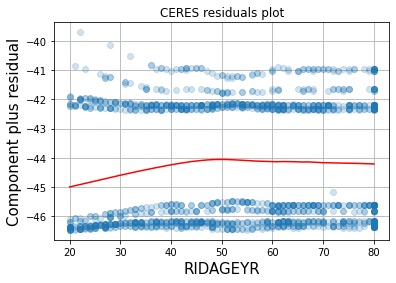

In [29]:
fig = r6.plot_ceres_residuals("RIDAGEYR");
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
add_lowess(ax, frac=0.5)
ax.grid(True);

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?

Lifetime drinking increases up to around age 50, and is nearly constant (or slightly declining) beyond that age.